In [126]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from numpy import append, array, diagonal, tril, triu
from numpy.linalg import inv
from scipy.linalg import lu
from scipy.linalg import solve
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot
np.random.seed(123)
import warnings

from sympy import *
import sympy as sym

### Question 1 : The Efficient Frontier in the Optimal Portfolio Model

In this question we want to compute and plot the efficient frontier in the optimal portfolio model. The efficient frontier is the set of portfolios that satisfy the condition that no other portfolio exists with a higher expected return but with the same risk (i.e., the standard deviation of the return). We use the same case we considered in class, namely with the following vector of returns c and covariance matrix H:

$$c = \begin{bmatrix} 0.10 \\ 0.20 \\ -0.15 \end{bmatrix}$$

$$H = \begin{bmatrix} 0.005 & -0.010 & 0.004 \\ -0.010 & 0.040 & -0.002\\ 0.004 & -0.002 & 0.023 \end{bmatrix}$$



(a) Generate a discrete grid of 21 equidistant points on the expected rate of return. The boundaries must be: the rate of return of the portfolio with the minimum global variance, and the rate of return of the portfolio with the highest return. For each value on the grid of expected rate of returns, compute the portfolio that minimizes the risk subject to the additional linear (equality) constraint that the portfolio has
to deliver that specific rate of return

In [178]:
# Rate of returns

c = np.array([0.10,0.20,-0.15])
c

array([ 0.1 ,  0.2 , -0.15])

In [179]:
# Variance/Covariance Matrix

H = ([[0.005, -0.010,0.004],
     [-0.010, 0.040, -0.002],
     [0.004, -0.002, 0.023]])
H

[[0.005, -0.01, 0.004], [-0.01, 0.04, -0.002], [0.004, -0.002, 0.023]]

In [ ]:
#Finding the expected return for the portfolio with the minimum global variance

In [180]:
def objective(x):
    return x@H@x

In [181]:
# initial guesses

n = 3
x0 = np.zeros(n)
x0[0] = 1.0/n
x0[1] = 1.0/n
x0[2] = 1.0/n

In [182]:
# show initial objective

print('Initial SSE Objective: ' + str(objective(x0)))

Initial SSE Objective: 0.005777777777777777


In [183]:
# Constraint that makes sure the sum of the weights is equal to 1

def constraint(x):
    return 1-np.sum(x)

In [184]:
# set "minimize" optimizer options and call it

b = (0,np.inf)
bnds = (b, b,b)
con = {'type': 'eq', 'fun': constraint} 

solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=con)

x = solution.x

     fun: 0.0015384615384615393
     jac: array([0.00307692, 0.00307692, 0.00523077])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.76923077, 0.23076923, 0.        ])


In [61]:
# risk is represented by the s.d, hence we'll need to compute a square-root
import math

# show final objective
print('Final SSE Objective: ' + str(objective(x)))

# show final expected return
print('Final expected return: ' + str(x@c))

# show final risk
print('Final risk: ', math.sqrt(x@H@x) )

# show solution
print('Optimal Portfolio')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))

Final SSE Objective: 0.0015384615384615393
Final expected return: 0.1230769226786553
Final risk:  0.039223227027636816
Optimal Portfolio
x1 = 0.769230773213447
x2 = 0.23076922678655298
x3 = 0.0


In [20]:
# Stores the value of return for the portfolio with the minimum global variance
rp_min = x@c
rp_min

0.1230769226786553

In [ ]:
# Now I need to find the portfolio that has the highest exprected return

In [158]:
def objective(x):
    return x@H@x

In [159]:
# initial guesses
n = 3
x0 = np.zeros(n)
x0[0] = 1.0/n
x0[1] = 1.0/n
x0[2] = 1.0/n

# compute the max expectd return
maxret = max(c)

In [160]:
# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

Initial SSE Objective: 0.005777777777777777


In [161]:
def constraintsum(x):
    return 1-np.sum(x)

In [24]:
def constraintmax(x):
    return x@c-maxret

In [25]:
# set "minimize" optimizer options and call it
b = (0,np.inf)
bnds = (b, b, b)
conmax1 = {'type': 'eq', 'fun': constraintsum} 
conmax2 = {'type': 'eq', 'fun': constraintmax}
conmax = ([conmax1,conmax2])

solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=conmax)
x = solution.x

In [26]:
# risk is represented by the s.d., hence we'll need to compute a square-root
import math

# show final objective
print('Final SSE Objective: ' + str(objective(x)))

# show final expected return
print('Final expected return: ' + str(x@c))

# show final risk
print('Final risk: ', math.sqrt(x@H@x) )

# show solution
print('Optimal Portfolio')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))

Final SSE Objective: 0.0399999999996584
Final expected return: 0.19999999999965842
Final risk:  0.199999999999146
Optimal Portfolio
x1 = 3.416075338184485e-12
x2 = 0.999999999996584
x3 = 0.0


In [28]:
# Stores value of return for portfolio with the highest rate of return
rp_max = x@c
rp_max

0.19999999999965842

In [177]:
# Creating our target varibles that we need to use
target = np.linspace(rp_min, rp_max, 21)
target

array([0.12307692, 0.12692308, 0.13076923, 0.13461538, 0.13846154,
       0.14230769, 0.14615385, 0.15      , 0.15384615, 0.15769231,
       0.16153846, 0.16538462, 0.16923077, 0.17307692, 0.17692308,
       0.18076923, 0.18461538, 0.18846154, 0.19230769, 0.19615385,
       0.2       ])

In [223]:
# Creating a df to store the efficient portfolios
efficient_portfolios = pd.DataFrame(columns = ['Risk', 'Expected Return', 'Target Return'])

In [224]:
for i in range(len(target)):
    
    def objective(x):
        return x@H@x

    # initial guesses
    n = 3
    x0 = np.zeros(n)
    x0[0] = 1.0/n
    x0[1] = 1.0/n
    x0[2] = 1.0/n

    def constraintsum(x):
        return 1-np.sum(x)
    
    # New Constraint added to make sure expected return of portfolio equals target
    def constrainttarget(x):
        return x@c-target[i]
    
    # set "minimize" optimizer options and call it
    b = (0,np.inf)
    bnds = (b, b, b)
    conmax1 = {'type': 'eq', 'fun': constraintsum} 
    conmax2 = {'type': 'eq', 'fun': constrainttarget}
    conmax = ([conmax1,conmax2])

    solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=conmax)
    x = solution.x

    efficient_portfolios = efficient_portfolios.append({'Risk': math.sqrt(x@H@x), 'Expected Return': x@c,'Target Return':target[i] }, ignore_index=True)

efficient_portfolios

,Risk,Expected Return,Target Return
0,0.039223,0.123077,0.123077
1,0.040430,0.126923,0.126923
2,0.043853,0.130769,0.130769
3,0.049029,0.134615,0.134615
4,0.055470,0.138462,0.138462
5,0.062788,0.142308,0.142308
6,0.070711,0.146154,0.146154
7,0.079057,0.150000,0.150000
8,0.087706,0.153846,0.153846
9,0.096576,0.157692,0.157692


(b) The collection of (risk, return) pairs represents the efficient frontier. Plot it in a graph with the risk on the x-axis and the expected return on the y-axis.

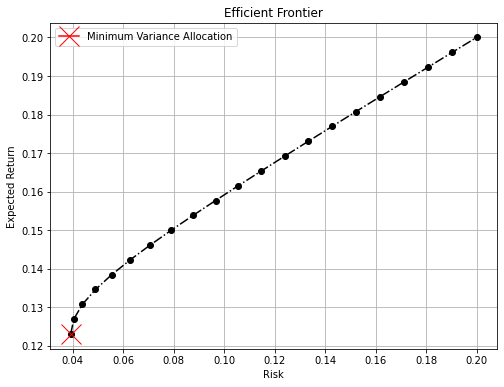

In [239]:
plt.subplots(figsize = (8,6))
plt.plot(efficient_portfolios['Risk'], efficient_portfolios['Expected Return'],  linestyle='-.',
        marker = "o", color = "black")
plt.xlabel("Risk")
plt.ylabel("Expected Return")
plt.grid()
plt.title('Efficient Frontier')
plt.plot(efficient_portfolios['Risk'][0], efficient_portfolios['Expected Return'][0], marker = "x", color = "red", 
         markersize = 20, label = "Minimum Variance Allocation")
plt.legend()
plt.show()

### Question 2: Utility Maximization

A consumer has preferences over two commodities x1 and x2. These preferences are represented by the following utility function:

$$ U(x_{1},x_{2}) =  [αx_{1}^{γ}+(1-α)x_{2}^{γ}]^{1/γ} $$

α and γ are parameters, and are such that 0 < α < 1 and −∞ < γ < 1. The consumer wants to maximize utility by choosing the optimal values $x_{1}^{*}$ and $x_{2}^{*}$, subject to the budget constraint:

$$ p_{1}x_{1} + p_{2}x_{2} = I $$

where pi > 0 denotes the price of good xi and I denotes income.


(a) To start with, set the parameters to their benchmark values: α = 0.5, γ = −1, p1 = 1, p2 = 1, I = 100.
Note: you may want to substitute the budget constraint into the objective function.
Write a code in Python that maximizes the consumer’s utility, by using the golden search algorithm. Report
your results and comment on your findings. Plot the objective function in a two-dimensional graph.

In [7]:
# Start by solving the constraint for x2 and substituting that into the utility function
# This is the function we are going to be maximizing for x1 (x)

f = lambda x: (0.5*(x)**(-1) + 0.5*(100-x)**(-1))**(-1)

In [8]:
# golden search algorithm function 

def mygolden(f,a, b, maxit = 1000, tol = 1/10000):
    alpha1 = (3 - np.sqrt(5)) / 2
    alpha2 = (np.sqrt(5) - 1) / 2
    if a > b:
        a, b = b, a
        
    x1 = a + alpha1 * (b - a)
    x2 = a + alpha2 * (b - a)

    f1, f2 = f(x1), f(x2)

    d = (alpha1 * alpha2)*(b - a) # initial d
    while d > tol:
        d = d * alpha2 # alpha2 is the golden ratio
        if f2 < f1: # x2 is new upper bound
            x2, x1 = x1, x1 - d
            f2, f1 = f1, f(x1)
        else:  # x1 is new lower bound
            x1, x2 = x2, x2 + d
            f1, f2 = f2, f(x2)
            
    if f1>f2:
        x = x2
    else:
        x = x1      
    return x    

In [9]:
# Passing the function we define above into the algorithm function. 0 and 100 represent
# the range of values we want it to look over.
x1 = round(mygolden(f, 0, 100),2)
# This gives us the optimal x1 value. 
x1

50.0

In [10]:
# If we sub in the given values for the constraint we know that x2 = 100-x1. Therefore we 
# substitute the optimal x1 value into the constraint to find optimal x2
x2 = 100 - x1

#optimal x2
x2

50.0

<ipython-input-7-58a8c1939480>:4: RuntimeWarning: divide by zero encountered in reciprocal
  f = lambda x: (0.5*(x)**(-1) + 0.5*(100-x)**(-1))**(-1)


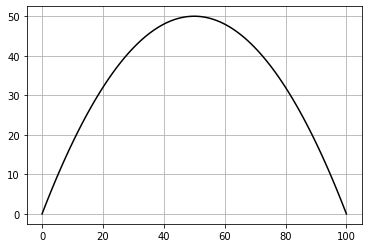

In [11]:
# Plotting the function
x = np.linspace(0,100,100)
y = f(x)
plt.figure()
plt.grid()
plt.plot(x,y, color = "black")
plt.show()

(b) Now consider the effect of changing some parameter values. 

In one case they are:
$$ α = 0.5, γ = −10, p1 = 1, p2 = 1, I = 100 $$ 
In another case they are:
$$α = 0.25, γ = −1, p1 = 1, p2 = 1, I = 100.$$
In a final case they are:
$$α = 0.5, γ = −1, p1 = 2, p2 = 1, I = 200.$$

Starting with first case α = 0.5, γ = −10, p1 = 1, p2 = 1, I = 100.

The constraint is 
$$x_{1}+x_{2} = 100$$

Subsituting that into the utilty function for x2 we get 
$$ U(x_{1},x_{2}) =  [0.5x_{1}^{-10}+0.5(100-x_{1})^{-10}]^{1/-10} $$

In [22]:
# Defining the function from above
f = lambda x: (0.5*(x)**(-10) + 0.5*(100-x)**(-10))**(1/-10)

In [23]:
def mygolden(f,a, b, maxit = 1000, tol = 1/10000):
    alpha1 = (3 - np.sqrt(5)) / 2
    alpha2 = (np.sqrt(5) - 1) / 2
    if a > b:
        a, b = b, a
        
    x1 = a + alpha1 * (b - a)
    x2 = a + alpha2 * (b - a)

    f1, f2 = f(x1), f(x2)

    d = (alpha1 * alpha2)*(b - a) # initial d
    while d > tol:
        d = d * alpha2 # alpha2 is the golden ratio
        if f2 < f1: # x2 is new upper bound
            x2, x1 = x1, x1 - d
            f2, f1 = f1, f(x1)
        else:  # x1 is new lower bound
            x1, x2 = x2, x2 + d
            f1, f2 = f2, f(x2)
            
    if f1>f2:
        x = x2
    else:
        x = x1      
    return x    

In [24]:
x1_opt = round(mygolden(f, 0, 100),2)
x1_opt

50.0

In [25]:
# Finding x2 using x1 optimal and budget constraint
x2_opt = 100 - x1_opt
x2_opt

50.0

In [26]:
# Creating a df to store the answers
results = pd.DataFrame(columns = ['x1 opt', 'x2 opt'])

In [27]:
results = results.append({'x1 opt': x1_opt, 'x2 opt':x2_opt}, ignore_index=True)

Now the second case α = 0.25, γ = −1, p1 = 1, p2 = 1, I = 100.

The constraint is 
$$x_{1}+x_{2} = 100$$
Subsituting that into the utilty function for x2 we get 
$$ U(x_{1},x_{2}) =  [0.25x_{1}^{-1}+0.25(100-x_{1})^{-1}]^{1/-1} $$

In [28]:
# Defining the function from above
f = lambda x: (0.25*(x)**(-1) + 0.25*(100-x)**(-1))**(1/-1)

In [29]:
x1_opt = round(mygolden(f, 0, 100),2)

# Finding x2 using x1 optimal and budget constraint
x2_opt = 100 - x1_opt

results = results.append({'x1 opt': x1_opt, 'x2 opt':x2_opt}, ignore_index=True)
results

,x1 opt,x2 opt
0,50.0,50.0
1,50.0,50.0


Now the final case α = 0.5, γ = −1, p1 = 2, p2 = 1, I = 200.

The constraint is 
$$2x_{1}+x_{2} = 200$$
Subsituting that into the utilty function for x2 we get 
$$ U(x_{1},x_{2}) =  [0.5x_{1}^{-1}+0.5(200-2x_{1})^{-1}]^{1/-1} $$

In [30]:
# Defining the function from above
f = lambda x: (0.5*(x)**(-1) + 0.5*(200-2*x)**(-1))**(1/-1)

In [31]:
x1_opt = round(mygolden(f, 0, 100),2)

# Finding x2 optimal using x1 optimal and budget constraint
x2_opt = 200 - 2*x1_opt

results = results.append({'x1 opt': x1_opt, 'x2 opt':x2_opt}, ignore_index=True)
results

,x1 opt,x2 opt
0,50.00,50.00
1,50.00,50.00
2,58.58,82.84


For the first two cases, because we have a cobb-douglas equation and the powers on each variable are the same, and the prices of the goods are the same, the consumers are indifferent between them. This is why we get that x1 optimal and x2 optimal are the same (50). In the third and final case, because the price is x1 is now double that of x2, and the powers are in the Utility equation are still equal, we see consumers switch preferences and choose to consume more x2 than x1. 

 Now the consumer’s preferences are over three commodities x1, x2, and x3. The utility function is:
 
$$ U(x1, x2, x3) = [αx_{1}^{γ} + βx_{2}^{γ} + (1 − α − β)x_{3}^{γ}]^{1/γ}$$

α, β and γ are parameters, and are such that 0 < α < 1, 0 < β < 1 and −∞ < γ < 1. The consumer wants to maximize utility by choosing the optimal values $ x_{1}^{*},x_{2}^{*}, x_{3}^{*} $, subject to the budget constraint:

$$p_{1}x_{1} + p_{2}x_{2} + p_{3}x_{3}= I$$

The parameters have these values: α = 0.5, β = 0.3, γ = −1, p1 = 1, p2 = 2, p3 = 3, I = 100.
Note: you may want to substitute the budget constraint into the objective function.
Write a code in Python that maximizes the consumer’s utility, by using a multivariate algorithm of your
choice. Report your results and comment on your findings. Plot the objective function both in a threedimensional graph and by using a contour plot.

Subbing the given parameters into the constraint we get 

$$x_{1} + 2x_{2}+3x_{3} = 100$$

if we rearange and solve for $x_{3}$ we get

$$x{3} = 100/3 - 2/3x_{2}- 1/3x_{1}$$

If we substitute that into the utility function and add the given params we get

$$ U(x1, x2, x3) = [0.5x_{1}^{-1} + 0.3x_{2}^{-1} + 0.2(100/3 - 2/3x_{2}- 1/3x_{1})^{-1}]^{-1}$$

To solve this I am going to use the nelder_mead method we talked about in class

In [35]:
def nelder_mead(f, x_start,
                step=0.1, no_improve_thr=10e-6,
                no_improv_break=10, max_iter=0,
                alpha=1., gamma=2., rho=-0.5, sigma=0.5):
    
    # init
    dim = len(x_start)
    prev_best = f(x_start)
    no_improv = 0
    res = [[x_start, prev_best]]

    for i in range(dim):
        x = copy.copy(x_start)
        x[i] = x[i] + step
        score = f(x)
        res.append([x, score])

    # simplex iter
    iters = 0
    while 1:
        # order
        res.sort(key=lambda x: x[1])
        best = res[0][1]

        # break after max_iter
        if max_iter and iters >= max_iter:
            return res[0]
        iters += 1

        # break after no_improv_break iterations with no improvement
        print('...best so far:', best)

        if best < prev_best - no_improve_thr:
            no_improv = 0
            prev_best = best
        else:
            no_improv += 1

        if no_improv >= no_improv_break:
            return res[0]

        # centroid
        x0 = [0.] * dim
        for tup in res[:-1]:
            for i, c in enumerate(tup[0]):
                x0[i] += c / (len(res)-1)

        # reflection
        xr = x0 + alpha*(x0 - res[-1][0])
        rscore = f(xr)
        if res[0][1] <= rscore < res[-2][1]:
            del res[-1]
            res.append([xr, rscore])
            continue

        # expansion
        if rscore < res[0][1]:
            xe = x0 + gamma*(x0 - res[-1][0])
            escore = f(xe)
            if escore < rscore:
                del res[-1]
                res.append([xe, escore])
                continue
            else:
                del res[-1]
                res.append([xr, rscore])
                continue

        # contraction
        xc = x0 + rho*(x0 - res[-1][0])
        cscore = f(xc)
        if cscore < res[-1][1]:
            del res[-1]
            res.append([xc, cscore])
            continue

        # reduction
        x1 = res[0][0]
        nres = []
        for tup in res:
            redx = x1 + sigma*(tup[0] - x1)
            score = f(redx)
            nres.append([redx, score])
        res = nres



Using this function: 

$$ U(x1, x2, x3) = [0.5x_{1}^{-1} + 0.3x_{2}^{-1} + 0.2(100/3 - 2/3x_{2}- 1/3x_{1})^{-1}]^{-1}$$

in order to maximize we can negate it to get:

$$ U(x1, x2, x3) = -[0.5x_{1}^{-1} + 0.3x_{2}^{-1} + (20/3 - 0.4/3x_{2}- 0.2/3x_{1})^{-1}]^{-1}$$

In [107]:
# Defining the function
def f(x):
    return -1*(0.5*x[0]**-1 + 0.3*x[1]**-1 + (0.2*(100/3-2/3*x[1]-1/3*x[0]))**-1)**-1

In [115]:
# Passing the function into the nelder_mead function with an initial guess
nelder_mead(f, np.array([1., 1.]))

...best so far: -1.0996935838311306
...best so far: -1.1750714361308077
...best so far: -1.2320748659168572
...best so far: -1.4104020001706317
...best so far: -1.5259172172587454
...best so far: -1.8874694948334176
...best so far: -2.083013596373825
...best so far: -2.6450697366191616
...best so far: -2.9151057758153707
...best so far: -3.3239720392556382
...best so far: -3.3239720392556382
...best so far: -3.3239720392556382
...best so far: -3.3239720392556382
...best so far: -3.398001365076091
...best so far: -3.398001365076091
...best so far: -3.398001365076091
...best so far: -3.419823319887018
...best so far: -3.471084887634045
...best so far: -3.482200589586937
...best so far: -3.482200589586937
...best so far: -3.48622205042238
...best so far: -3.48622205042238
...best so far: -3.48648289950839
...best so far: -3.48648289950839
...best so far: -3.487311083244837
...best so far: -3.487311083244837
...best so far: -3.487311083244837
...best so far: -3.4875127778962502
...best so 

[array([13.20312044,  7.23220414]), -3.487641607733475]

In [109]:
# Checking my result with scipy and a different initial guess to make sure that 
# it is converging.

optimize.minimize(f,[10,10], method='Nelder-Mead')

#We can see that the answers are the same. So it is safe to safe they are correct.

 final_simplex: (array([[13.20540162,  7.23287885],
       [13.20537993,  7.23285979],
       [13.20533851,  7.23290926]]), array([-3.48764163, -3.48764163, -3.48764163]))
           fun: -3.48764163202335
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 38
        status: 0
       success: True
             x: array([13.20540162,  7.23287885])

In [118]:
x1_opt = 13.21
x2_opt = 7.23

x3_opt = 100/3 - 2/3*x2_opt - 1/3*x1_opt
x3_opt

24.110000000000003

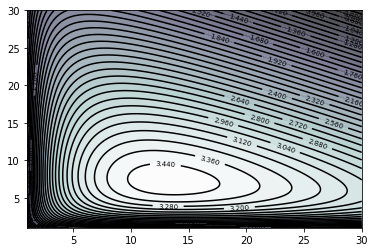

In [145]:
# Graphing the function using countour plots

f = lambda x,y: (0.5*x**-1 + 0.3*y**-1 + (0.2*(100/3-2/3*y-1/3*x))**-1)**-1

n = 250
x = np.linspace(1, 30, n)
y = np.linspace(1, 30, n)
X,Y = np.meshgrid(x, y) 

plt.figure()
x0,y0 = 0,0

plt.contourf(X, Y, f(X, Y), 38, alpha=.75,cmap='bone')

C = plt.contour(X, Y, f(X, Y), 38, colors='black')

plt.clabel(C, inline=True, fontsize=7)

plt.show()

In [147]:
!jupyter-nbconvert --to PDFviaHTML Assignment_4.pdf

[NbConvertApp] WARNING | pattern 'Assignment_4.pdf' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout